Flores Lara Alberto 6BV1

Clasificación para CIFAR usando CNN con técnicas avanzadas

Librerias necesarias:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input, Add, SeparableConv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import time

Definir las funciones para crear la CNN con tecnicas avanzadas y para el entrenamiento y validación del modelo

In [3]:
def build_cnn_advanced(input_shape):
    input_layer = Input(shape=input_shape)

    # Primera capa convolucional con Batch Normalization
    x = Conv2D(32, (3, 3), activation='relu')(input_layer)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Segunda capa convolucional separable
    x = SeparableConv2D(64, (3, 3), activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Residual block
    residual = Conv2D(64, (1, 1), padding='same')(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = Add()([x, residual])  # Conexión residual

    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    output_layer = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    return model

def train_and_evaluate(model, x_train, y_train, x_test, y_test, epochs=30, batch_size=64):
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
    end_time = time.time()

    # Evaluación
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    report = classification_report(y_true, y_pred, target_names=[f'Clase {i}' for i in range(10)])
    print(report)
    print(f"Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")

    return history, end_time - start_time

Cargar los datos de entrada

In [4]:
# Cargar CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizamos los valores de los píxeles en el rango [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertimos las etiquetas a one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Inicializar el modelo con el tamaño de nuestras imagenes y realizar el entrenamiento con la validacion

In [5]:
model_cnn_adv = build_cnn_advanced((32, 32, 3))
history_cnn_adv, time_cnn_adv = train_and_evaluate(model_cnn_adv, x_train, y_train_cat, x_test, y_test_cat)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.4657 - loss: 1.5505 - val_accuracy: 0.4459 - val_loss: 1.6859
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.6760 - loss: 0.9308 - val_accuracy: 0.4862 - val_loss: 1.9622
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.7445 - loss: 0.7229 - val_accuracy: 0.6992 - val_loss: 0.8717
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.7938 - loss: 0.5870 - val_accuracy: 0.6595 - val_loss: 1.0294
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.8383 - loss: 0.4684 - val_accuracy: 0.6895 - val_loss: 1.0357
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.8689 - loss: 0.3753 - val_accuracy: 0.7213 - val_loss: 0.9942
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9023 - loss: 0.2803 - val_accuracy: 0.6929 - val_loss: 1.1219
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9223 - loss: 0.2266 - 

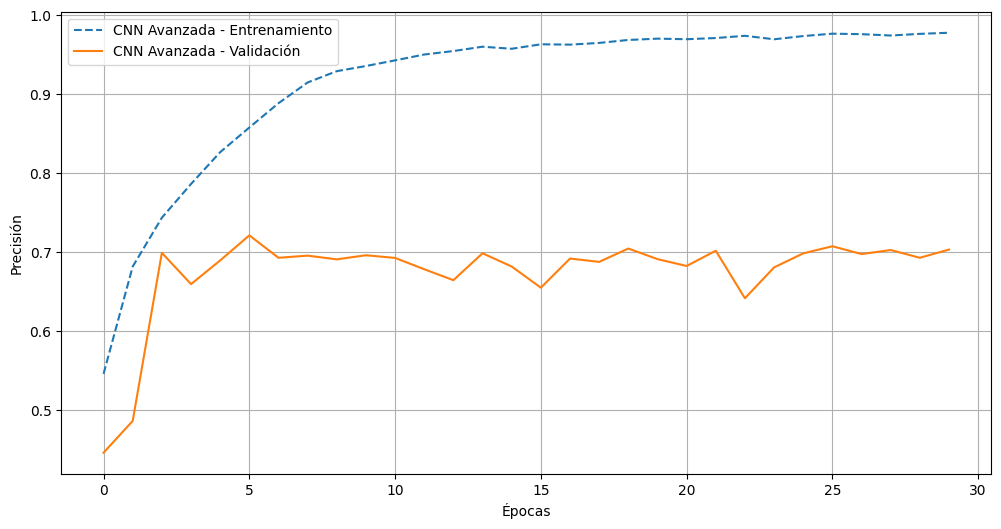

In [6]:
# Graficar precisión de entrenamiento y validación
def plot_history(histories, labels):
    plt.figure(figsize=(12, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history['accuracy'], label=f'{label} - Entrenamiento', linestyle='--')
        plt.plot(history.history['val_accuracy'], label=f'{label} - Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history([history_cnn_adv], ['CNN Avanzada'])


Clasificación para Mnist usando CNN con tecnicas avanzadas

Cargar los datos de entrada

In [7]:
# Cargar Mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizamos los valores de los píxeles en el rango [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape para agregar el canal de color (1 para MNIST)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convertimos las etiquetas a one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Inicializar el modelo con el tamaño de nuestras imagenes y realizar el entrenamiento con la validacion

In [8]:
model_cnn_adv = build_cnn_advanced((28, 28, 1))
history_cnn_adv, time_cnn_adv = train_and_evaluate(model_cnn_adv, x_train, y_train_cat, x_test, y_test_cat, 10)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - accuracy: 0.9307 - loss: 0.2295 - val_accuracy: 0.9786 - val_loss: 0.0722
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9879 - loss: 0.0415 - val_accuracy: 0.9867 - val_loss: 0.0463
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9920 - loss: 0.0262 - val_accuracy: 0.9864 - val_loss: 0.0454
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9930 - loss: 0.0219 - val_accuracy: 0.9855 - val_loss: 0.0591
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9940 - loss: 0.0192 - val_accuracy: 0.9901 - val_loss: 0.0407
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9954 - loss: 0.0156 - val_accuracy: 0.9811 - val_loss: 0.0805
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9941 - loss: 0.0192 - val_accuracy: 0.9855 - val_loss: 0.0618
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9948 - loss: 0.0156 - 

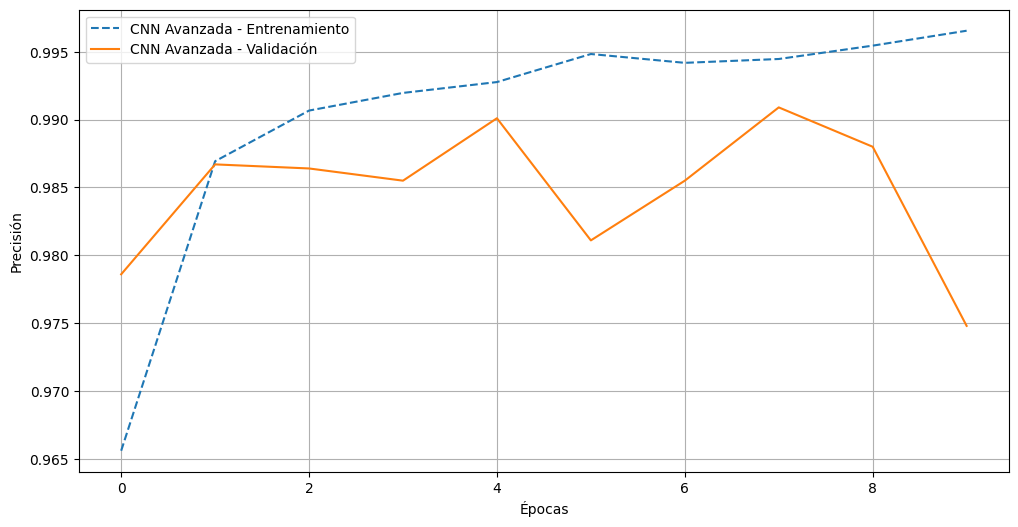

In [9]:
# Graficar precisión de entrenamiento y validación
def plot_history(histories, labels):
    plt.figure(figsize=(12, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history['accuracy'], label=f'{label} - Entrenamiento', linestyle='--')
        plt.plot(history.history['val_accuracy'], label=f'{label} - Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history([history_cnn_adv], ['CNN Avanzada'])
